In [38]:
import numpy as np
import matplotlib.pyplot as plt
from ecog.utils.bands import chang_lab

In [49]:
cfs = chang_lab['cfs']
X = np.log(abs(np.random.randn(40, 1000)) * 1./(cfs[:, np.newaxis]))

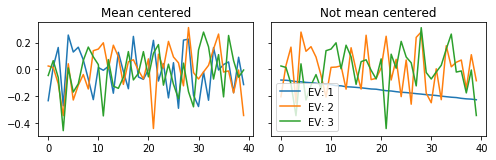

In [50]:
mean_fracs = [0, 1.]
names = ['Mean centered', 'Not mean centered']
rows = len(mean_fracs) // 2
f, axes = plt.subplots(rows, 2, figsize=(7, 7/3 * rows), sharey=True)
mean = X.mean(axis=1, keepdims=True)
Xp = X - mean
for ii, (mf, ax) in enumerate(zip(mean_fracs, axes.ravel())):
    Xr = Xp + mf * mean
    u, s, vh = np.linalg.svd(Xr)
    for jj in range(3):
        ax.plot(u[:, jj], label='EV: {}'.format(jj+1))
    ax.set_title(names[ii])
axes.ravel()[1].legend(loc='best')
f.tight_layout()
plt.savefig('/home/jesse/Downloads/pca.pdf')